# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np
df = pd.read_csv('data/human_body_temperature.csv')

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)
SkewtestResult(statistic=-0.021370491432771, pvalue=0.9829501126135382)


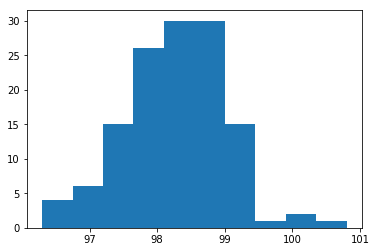

In [77]:
# 1 is the data normally distributed?
plt.hist(df['temperature'])
print(scipy.stats.normaltest(df.temperature))
# p value greater than alpha=.05, cannot reject null hypothesis that data is normally distributed
print(scipy.stats.skewtest(df.temperature))

In [78]:
# 2 Is the sample size large? Are the observations independent?
len(df.temperature)
# n=130 seems big enough for central limit theorem to apply.  Of course this is a small sample compared to number of all humans.
# would need more background info on how the dataset was acquired to determine if each temperature is truy independent, but that
# seems to be the case in this context.

130

In [59]:
# 3 Is the true population mean really 98.6 degrees F?
# In this case the null hypothesis would mean population mean (mu) is equal to 98.6.
# bootstrap hypothesis test:
temps = np.array(df.temperature)
shifted_temps = temps - np.mean(temps) + 98.6
bs_replicates = np.empty(10000)
for i in range(10000):
        bs_replicates[i] = np.mean(np.random.choice(shifted_temps, size=len(shifted_temps)))

p = np.sum(bs_replicates <= np.mean(temps))/10000
print('p = ', p)
# p-value of zero suggest the null hypothesis is false and should be rejected.
# 'frequentist' tests:
# I have one sample so there would be no grounds to use a two sample test.
# Because n is greater than 30 that would suggest to use the z-score but because the population standard deviation is unknown
# I have to estimate it with the sample standard deviation so arguably either test could be used.
Z = (np.mean(temps)-98.6)/(np.std(temps)/np.sqrt(len(temps)))
print(Z)
scipy.stats.ttest_1samp(temps,98.6)
# both tests indicate that there is an extremely low probability that this sample was drawn from a population with a mean of 
# 98.6 and the null should be rejected.  The slight differences are because the two statistics use different distributions.

p =  0.0
-5.4759252020785585


Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [65]:
# 4 Draw a small sample of size 10 from the data and repeat both frequentist tests.
sample = np.random.choice(temps,size=10,replace=False)
Z = (np.mean(sample)-98.6)/(np.std(sample)/np.sqrt(len(sample)))
print(Z)
scipy.stats.ttest_1samp(sample,98.6)
# The t-test is t-test is the right one to use because n<30.
# There is now a greater difference between the t and Z statistics. This t-test now gives less than 99% confidence for the 
# rejection of the null hypothesis.  The t test and Z test converge as the sample size increases.

-1.6916814420045578


Ttest_1sampResult(statistic=-1.604869929651733, pvalue=0.14298538339187772)

In [76]:
# 5 At what temperature should we consider someone's temperature to be "abnormal"?
# I would say a value greater than 3 standard deviations away from the mean would be abnormal since that would equate to a 
# 99.7% confidence interval in a normal distribution
print(np.std(temps)/np.sqrt(len(temps))) #standard error
# bootstrap approach for calculating abnormal temperatures, taking the standard deviations of 10,000 simulated samples
bs_replicates = np.empty(10000)
for i in range(10000):
        bs_replicates[i] = np.std(np.random.choice(temps, size=len(temps)))
abnormal_low = np.mean(temps) - 3*np.mean(bs_replicates)
abnormal_high = np.mean(temps) + 3*np.mean(bs_replicates)
print(abnormal_low,abnormal_high)
# frequentist approach
abnormal_low = np.mean(temps) - 3*np.std(temps)
abnormal_high = np.mean(temps) + 3*np.std(temps)
print(abnormal_low,abnormal_high)

0.06405661469519337
96.07124654553661 100.42721499292489
96.05815743251563 100.44030410594587


In [91]:
# 6 Is there a significant difference between males and females in normal temperature?
males= df.loc[df['gender']=='M']
females= df.loc[df['gender']=='F']
male_temps = np.array(males.temperature)
female_temps = np.array(females.temperature)
mu1 = np.mean(male_temps)
mu2 = np.mean(female_temps)
diff = mu2-mu1
n1 = len(male_temps)
n2 = len(female_temp)
std1 = np.std(male_temps)
std2 = np.std(female_temps)
print(mu1)
print(mu2)
print(diff)
criticalZ = scipy.stats.norm.ppf(.99)
# My approach will be to use a null hypothesis that there is no difference bewteen the mean temperature of males and females
# i.e. mu1 - mu2 = 0.  For alpha of .01 (or 99% confidence) the critical z value is for a normalized standard distribution is 
# obtained by scipy.stats.norm.ppf.  I will calculate the standard deviation of the distribution of the difference in means for  
# this null hypothesis and multiply it by the critical z score to obtain the critical difference of means for 99% confidence.

diffofmeanstd = np.sqrt((std1**2/n1)+(std2**2/n2))
criticaldiffofmeans = diffofmeanstd*criticalZ
print(criticaldiffofmeans)
# The critical difference in means is ~ 0.292 which is greater than the observed difference.  Cannot reject null here.
# This means there is 1% chance of getting a difference greater than 0.292 if the null is true.
# It should be noted the difference is just barely under the critical value and for alpha of .05 the null would be rejected.

98.10461538461537
98.39384615384614
0.2892307692307696
0.29213505467275824
